In [2]:
#implement agglomerative hierarchical clustering algorithm using appropriate dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [4]:
x=pd.read_csv('CC GENERAL.csv')

In [5]:
x.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
x.shape

(8950, 18)

In [7]:
x.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [8]:
x=x.drop('CUST_ID',axis=1)


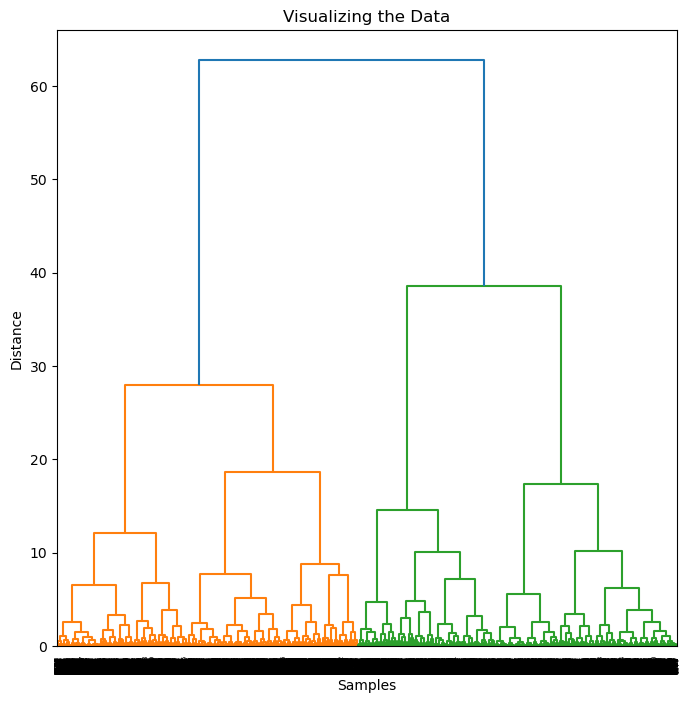

In [9]:

# Assuming 'x' is your input DataFrame
x.fillna(method='ffill', inplace=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Normalize the data
X_normalized = normalize(X_scaled)

# Convert to DataFrame
DataFrameX_normalized = pd.DataFrame(X_normalized)

# Apply PCA
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
x_principal = pd.DataFrame(X_principal, columns=['P1', 'P2'])

# Plot the dendrogram
plt.figure(figsize=(8, 8))
plt.title("Visualizing the Data")
dendrogram = shc.dendrogram(shc.linkage(X_principal, method='ward'))
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


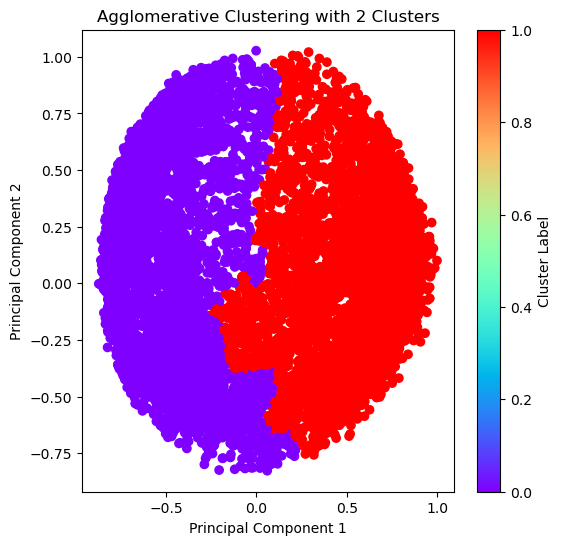

In [16]:

ac2 = AgglomerativeClustering(n_clusters=2)
c = ac2.fit_predict(x_principal)

# Plotting the clusters
plt.figure(figsize=(6, 6))
plt.scatter(x_principal['P1'], x_principal['P2'], c=c, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering with 2 Clusters')
plt.colorbar(label='Cluster Label')
plt.show()

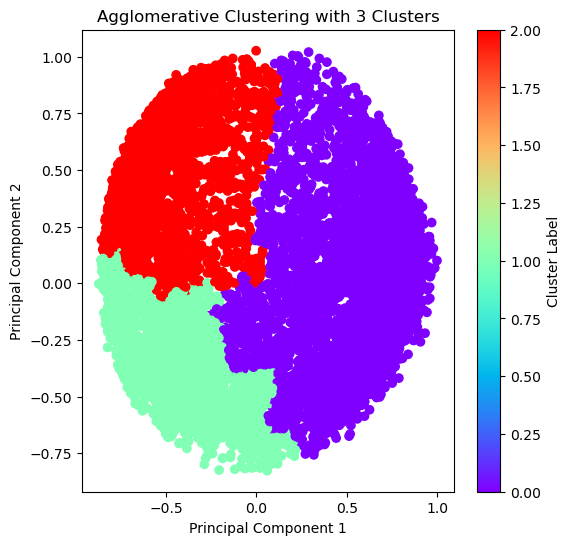

In [18]:

ac2 = AgglomerativeClustering(n_clusters=3)#similarly 4,5,6 
c = ac2.fit_predict(x_principal)

# Plotting the clusters
plt.figure(figsize=(6, 6))
plt.scatter(x_principal['P1'], x_principal['P2'], c=c, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering with 3 Clusters')
plt.colorbar(label='Cluster Label')
plt.show()

In [21]:
silhouette_scores=[]
silhouette_scores.append(silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
silhouette_scores.append(silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac6.fit_predict(X_principal))) 
print(silhouette_scores)


plt.bar(k, silhouette_scores)

pit.xlabel('Number of Clusters', fontsize =20) 
plt.ylabel('S(1)', fontsize=20)

plt.show()

NameError: name 'ac3' is not defined